# Datos de fútbol del siglo XXI #

https://www.kaggle.com/datasets/adamgbor/club-football-match-data-2000-2025/data

### En este data set hay datos de 38 ligas del mundo. Las columnas son las siguientes:

**Date**:	    Fecha del partido.

**League**:	    Nombre de la liga o competición en la que se juega el partido.

**HomeTeam**:	Equipo que juega como local.

**AwayTeam**:	Equipo que juega como visitante.

**FTHG**:	    Goles marcados por el equipo local al final del tiempo reglamentario (Full Time Home Goals).

**FTAG**:	    Goles marcados por el equipo visitante al final del tiempo reglamentario (Full Time Away Goals).

**FTR**:	        Resultado del partido: H = Victoria del local, D = Empate (Draw), A = Victoria del visitante.

**HTHG**:	    Goles del equipo local al medio tiempo (Half Time Home Goals).

**HTAG**:	    Goles del equipo visitante al medio tiempo (Half Time Away Goals).

**HTR**:	        Resultado al medio tiempo (Half Time Result)

**Referee**:	    Nombre del árbitro que dirigió el partido 

**Attendance**:	Número de espectadores del partido 

**Odds_1, Odds_X, Odds_2**:	Cuotas (odds) de apuesta para victoria local (1), empate (X), y victoria visitante (2) antes del partido

**HomeShots,AwayShots**:	Número de tiros que cada equipo hizo en el partido 

**HomeCorners, AwayCorners**:	Número de saques de esquina que cada equipo tuvo 

**HomeYellowCards, AwayYellowCards**:	Tarjetas amarillas recibidas por local y visitante

**HomeRedCards, AwayRedCards**:	Tarjetas rojas recibidas por local y visitante

## Hipótesis

1. Se ganan más partidos como local que como visitante

2. El equipo que tiene más jugadores con tarjeta amarilla, pierde

2. El equipo que tiene más jugadores expulsados, pierde

3. El FC Barcelona es más ayudado que el Real Madrid

4. El equipo favorito gana más veces el partido




In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [180]:
df = pd.read_csv("Matches.csv") 

df

C:\Users\david\AppData\Local\Temp\ipykernel_17380\3394063078.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Matches.csv")


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,17:30:00,Cartagena,Mirandes,1339.21,1544.15,3.0,6.0,7.0,...,2.40,1.8,1.95,1.85,0.0209,0.0118,0.0099,0.8084,0.1386,0.0104
230553,SP2,2025-06-01,17:30:00,Almeria,Tenerife,1544.16,1433.67,4.0,10.0,1.0,...,2.55,-1.8,1.80,2.00,0.3799,0.0630,0.2806,0.0160,0.2332,0.0274
230554,SP2,2025-06-01,17:30:00,La Coruna,Elche,1473.67,1569.98,0.0,3.0,3.0,...,2.63,1.3,1.78,2.03,0.0224,0.7482,0.0100,0.1201,0.0180,0.0813
230555,SP2,2025-06-01,17:30:00,Oviedo,Cadiz,1574.90,1525.76,7.0,13.0,6.0,...,1.51,-0.8,1.95,1.85,0.2070,0.2490,0.2334,0.0211,0.2634,0.0261


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230557 entries, 0 to 230556
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Division     230557 non-null  object 
 1   MatchDate    230557 non-null  object 
 2   MatchTime    99072 non-null   object 
 3   HomeTeam     230557 non-null  object 
 4   AwayTeam     230557 non-null  object 
 5   HomeElo      141597 non-null  float64
 6   AwayElo      141528 non-null  float64
 7   Form3Home    229057 non-null  float64
 8   Form5Home    229057 non-null  float64
 9   Form3Away    229057 non-null  float64
 10  Form5Away    229057 non-null  float64
 11  FTHome       230554 non-null  float64
 12  FTAway       230554 non-null  float64
 13  FTResult     230554 non-null  object 
 14  HTHome       175977 non-null  float64
 15  HTAway       175977 non-null  float64
 16  HTResult     175977 non-null  object 
 17  HomeShots    114735 non-null  float64
 18  AwayShots    114738 non-

In [182]:
df.columns

Index(['Division', 'MatchDate', 'MatchTime', 'HomeTeam', 'AwayTeam', 'HomeElo',
       'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome',
       'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots',
       'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls',
       'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed',
       'AwayRed', 'OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw',
       'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize',
       'HandiHome', 'HandiAway', 'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB',
       'C_PHB'],
      dtype='object')

In [183]:
df = df.iloc[:,:-16]



In [184]:
df = df.drop(columns=["MatchTime", "AwayElo","HomeElo","Form3Home","Form5Home","Form3Away","Form5Away"])

In [185]:
df.columns

Index(['Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FTHome', 'FTAway',
       'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots', 'AwayShots',
       'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners',
       'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed',
       'OddHome', 'OddDraw', 'OddAway'],
      dtype='object')

In [186]:
#F1 Francia T1 Turquía D1 Alemania B1 Belgica E0 Inglaterra N1 Holanda P1 Portugal SP1 España I1 Italia SC0 Escocia G1 Grecia

In [187]:
grandes_ligas = ["SP1","F1", "E0","I1","D1","N1","P1"]

resto_ligas = df[~df["Division"].isin(grandes_ligas)]

resto_ligas

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
2,F2,2000-07-28,Wasquehal,Nancy,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,F2,2000-07-29,Ajaccio,Le Mans,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,F2,2000-07-29,Beauvais,Montpellier,1.0,3.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,F2,2000-07-29,Caen,Cannes,2.0,2.0,D,1.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,F2,2000-07-29,Chateauroux,Martigues,1.0,1.0,D,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,Cartagena,Mirandes,1.0,3.0,A,1.0,2.0,A,...,8.0,4.0,6.0,3.0,1.0,0.0,0.0,12.33,6.19,1.20
230553,SP2,2025-06-01,Almeria,Tenerife,2.0,0.0,H,1.0,0.0,H,...,11.0,2.0,6.0,1.0,5.0,0.0,0.0,1.22,6.23,10.97
230554,SP2,2025-06-01,La Coruna,Elche,0.0,4.0,A,0.0,3.0,A,...,18.0,2.0,0.0,2.0,2.0,0.0,0.0,5.30,4.43,1.52
230555,SP2,2025-06-01,Oviedo,Cadiz,2.0,1.0,H,2.0,1.0,H,...,8.0,8.0,3.0,0.0,1.0,0.0,0.0,1.68,3.14,6.31


In [188]:
mascara_barsa = (df["HomeTeam"] == "Barcelona") | (df["AwayTeam"] == "Barcelona")

In [189]:
df_barsa_amarillas = df[mascara_barsa]



In [190]:
df_barsa_amarillas.info()

df_barsa_amarillas.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 503 to 230535
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Division     901 non-null    object 
 1   MatchDate    901 non-null    object 
 2   HomeTeam     901 non-null    object 
 3   AwayTeam     901 non-null    object 
 4   FTHome       901 non-null    float64
 5   FTAway       901 non-null    float64
 6   FTResult     901 non-null    object 
 7   HTHome       901 non-null    float64
 8   HTAway       901 non-null    float64
 9   HTResult     901 non-null    object 
 10  HomeShots    722 non-null    float64
 11  AwayShots    722 non-null    float64
 12  HomeTarget   722 non-null    float64
 13  AwayTarget   722 non-null    float64
 14  HomeFouls    722 non-null    float64
 15  AwayFouls    722 non-null    float64
 16  HomeCorners  722 non-null    float64
 17  AwayCorners  722 non-null    float64
 18  HomeYellow   722 non-null    float64
 19  AwayYell

C:\Users\david\AppData\Local\Temp\ipykernel_17380\3653787934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barsa_amarillas.dropna(inplace=True)


In [191]:
df_barsa_amarillas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722 entries, 27997 to 230535
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Division     722 non-null    object 
 1   MatchDate    722 non-null    object 
 2   HomeTeam     722 non-null    object 
 3   AwayTeam     722 non-null    object 
 4   FTHome       722 non-null    float64
 5   FTAway       722 non-null    float64
 6   FTResult     722 non-null    object 
 7   HTHome       722 non-null    float64
 8   HTAway       722 non-null    float64
 9   HTResult     722 non-null    object 
 10  HomeShots    722 non-null    float64
 11  AwayShots    722 non-null    float64
 12  HomeTarget   722 non-null    float64
 13  AwayTarget   722 non-null    float64
 14  HomeFouls    722 non-null    float64
 15  AwayFouls    722 non-null    float64
 16  HomeCorners  722 non-null    float64
 17  AwayCorners  722 non-null    float64
 18  HomeYellow   722 non-null    float64
 19  AwayYe

In [192]:
Am_Recib_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","HomeYellow"].sum()

print(Am_Recib_H_Bar) #Amarillas Recibidas en Casa

Falt_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","HomeFouls"].sum()

print(Falt_H_Bar) #Faltas realizadas en Casa

Falt_Ama_H_Bar = Falt_H_Bar/Am_Recib_H_Bar

print(Falt_Ama_H_Bar)

613.0
4167.0
6.797716150081566


In [193]:
Am_Rival_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","AwayYellow"].sum()

print(Am_Rival_H_Bar) #Amarillas Recibidas por el rival en casa del barsa

Falt_Rival_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","AwayFouls"].sum()

print(Falt_Rival_H_Bar) #Falyas realizadas por el rival en casa del barsa

Falt_Ama_H_Riv_Bar = Falt_Rival_H_Bar/Am_Rival_H_Bar

print(Falt_Ama_H_Riv_Bar)

955.0
5207.0
5.452356020942409


In [194]:
Am_Recib_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","AwayYellow"].sum()


print(Am_Recib_A_Bar)  #Amarillas Recibidas fuera de casa

Falt_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","AwayFouls"].sum()


print(Falt_A_Bar)  #Faltas Realizadas fuera de casa

Falt_Ama_A_Bar = Falt_A_Bar/Am_Recib_A_Bar

print(Falt_Ama_A_Bar)



788.0
4111.0
5.217005076142132


In [195]:
Am_Rival_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","HomeYellow"].sum()

print(Am_Rival_A_Bar)  #Amarillas Recibidas por el rival en casa

Falt_Rival_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","HomeFouls"].sum()

print(Falt_Rival_A_Bar)  #Amarillas Recibidas por el rival en casa

Falt_Ama_A_Riv_Bar = Falt_Rival_A_Bar/Am_Rival_A_Bar

print(Falt_Ama_A_Riv_Bar)


957.0
5751.0
6.009404388714733


In [196]:
#Tarjetas Rojas

In [197]:
Ro_Recib_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","HomeRed"].sum()
print(Ro_Recib_H_Bar) #Rojas Recibidas en Casa

Falt_Ro_H_Bar = Falt_H_Bar/Ro_Recib_H_Bar

print(Falt_Ro_H_Bar)

26.0
160.26923076923077


In [198]:
Ro_Rival_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","AwayRed"].sum()
print(Ro_Rival_H_Bar) #Rojas Recibidas por el rival en casa del barsa

Falt_Ro_H_Riv_Bar = Falt_Rival_H_Bar/Ro_Rival_H_Bar

print(Falt_Ro_H_Riv_Bar)

50.0
104.14


In [199]:
Ro_Recib_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","AwayRed"].sum()
print(Ro_Recib_A_Bar)  #Rojas Recibidas en fuera de casa

Falt_Ro_A_Bar = Falt_A_Bar/Ro_Recib_A_Bar

print(Falt_Ro_A_Bar)

39.0
105.41025641025641


In [200]:
Ro_Rival_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","HomeRed"].sum()
print(Ro_Rival_A_Bar)  #Rojas Recibidas por el rival en casa

Falt_Ro_A_Riv_Bar = Falt_Rival_A_Bar/Ro_Rival_A_Bar

print(Falt_Ro_A_Riv_Bar)

67.0
85.83582089552239


In [201]:
#Real Madrid

In [202]:
mascara_RM = (df["HomeTeam"] == "Real Madrid") | (df["AwayTeam"] == "Real Madrid")

In [203]:
df_RM_amarillas = df[mascara_RM]



In [204]:
df_RM_amarillas.info()

df_RM_amarillas.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 505 to 230485
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Division     902 non-null    object 
 1   MatchDate    902 non-null    object 
 2   HomeTeam     902 non-null    object 
 3   AwayTeam     902 non-null    object 
 4   FTHome       902 non-null    float64
 5   FTAway       902 non-null    float64
 6   FTResult     902 non-null    object 
 7   HTHome       902 non-null    float64
 8   HTAway       902 non-null    float64
 9   HTResult     902 non-null    object 
 10  HomeShots    722 non-null    float64
 11  AwayShots    722 non-null    float64
 12  HomeTarget   722 non-null    float64
 13  AwayTarget   722 non-null    float64
 14  HomeFouls    722 non-null    float64
 15  AwayFouls    722 non-null    float64
 16  HomeCorners  722 non-null    float64
 17  AwayCorners  722 non-null    float64
 18  HomeYellow   722 non-null    float64
 19  AwayYell

C:\Users\david\AppData\Local\Temp\ipykernel_17380\2938700546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RM_amarillas.dropna(inplace=True)


In [205]:
df_RM_amarillas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722 entries, 28045 to 230485
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Division     722 non-null    object 
 1   MatchDate    722 non-null    object 
 2   HomeTeam     722 non-null    object 
 3   AwayTeam     722 non-null    object 
 4   FTHome       722 non-null    float64
 5   FTAway       722 non-null    float64
 6   FTResult     722 non-null    object 
 7   HTHome       722 non-null    float64
 8   HTAway       722 non-null    float64
 9   HTResult     722 non-null    object 
 10  HomeShots    722 non-null    float64
 11  AwayShots    722 non-null    float64
 12  HomeTarget   722 non-null    float64
 13  AwayTarget   722 non-null    float64
 14  HomeFouls    722 non-null    float64
 15  AwayFouls    722 non-null    float64
 16  HomeCorners  722 non-null    float64
 17  AwayCorners  722 non-null    float64
 18  HomeYellow   722 non-null    float64
 19  AwayYe

In [206]:
Am_Recib_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","HomeYellow"].sum()

print(Am_Recib_H_RM) #Amarillas Recibidas por el Real Madrid en casa

Falt_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","HomeFouls"].sum()

print(Falt_H_RM) #Faltas del Real Madrid en casa

Falt_Ama_H_RM = Falt_H_RM/Am_Recib_H_RM

print(Falt_Ama_H_RM)




670.0
4497.0
6.7119402985074625


In [207]:
Am_Rival_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","AwayYellow"].sum()

print(Am_Rival_H_RM) #Amarillas Recibidas por el rival en casa del RM

Falt_Rival_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","AwayFouls"].sum()

print(Falt_Rival_H_RM) #Faltas Realizadas por el rival en casa del RM

Falt_Ama_H_Riv_RM = Falt_Rival_H_RM/Am_Rival_H_RM

print(Falt_Ama_H_Riv_RM)


887.0
5133.0
5.786922209695603


In [208]:
Am_Recib_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","AwayYellow"].sum()

print(Am_Recib_A_RM) #Amarillas Recibidas por el Real Madrid fuera de casa

Falt_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","AwayFouls"].sum()

print(Falt_A_RM) #Faltas realizadas por el Real Madrid fuera de casa

Falt_Ama_A_RM = Falt_A_RM/Am_Recib_A_RM

print(Falt_Ama_A_RM)


857.0
4554.0
5.313885647607934


In [209]:
Am_Rival_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","HomeYellow"].sum()

print(Am_Rival_A_RM) #Amarillas Recibidas por el rival en casa

Falt_Rival_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","HomeFouls"].sum()

print(Falt_Rival_A_RM) #Amarillas Recibidas por el rival en casa

Falt_Ama_A_Riv_RM = Falt_Rival_A_RM/Am_Rival_A_RM

print(Falt_Ama_A_Riv_RM)


1029.0
5700.0
5.539358600583091


In [210]:
Ro_Recib_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","HomeRed"].sum()
print(Ro_Recib_H_RM)

Falt_Ro_H_RM = Falt_H_RM/Ro_Recib_H_RM

print(Falt_Ro_H_RM)

35.0
128.4857142857143


In [211]:
Ro_Rival_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","AwayRed"].sum()
print(Ro_Rival_H_RM)

Falt_Ro_H_Riv_RM = Falt_Rival_H_RM/Ro_Rival_H_RM

print(Falt_Ro_H_Riv_RM)

46.0
111.58695652173913


In [212]:
Ro_Recib_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","AwayRed"].sum()
print(Ro_Recib_A_RM)

Falt_Ro_A_RM = Falt_H_RM/Ro_Recib_A_RM

print(Falt_Ro_A_RM)

54.0
83.27777777777777


In [213]:
Ro_Rival_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","HomeRed"].sum()
print(Ro_Rival_A_RM)

Falt_Ro_A_Riv_RM = Falt_Rival_A_RM/Ro_Rival_A_RM

print(Falt_Ro_A_Riv_RM)

47.0
121.27659574468085


In [214]:
mask_resto_liga_sanciones = (df["Division"] == "SP1") & (df["HomeTeam"] != "Real Madrid") & (df["HomeTeam"] != "Barcelona") & (df["AwayTeam"] != "Real Madrid") & (df["AwayTeam"] != "Barcelona") 

In [215]:
df_resto_liga = df[mask_resto_liga_sanciones]

df_resto_liga = df_resto_liga.dropna()

df_resto_liga

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
27998,SP1,2005-08-27,Ath Bilbao,Sociedad,3.0,0.0,H,0.0,0.0,D,...,19.0,3.0,4.0,0.0,1.0,0.0,0.0,2.00,3.25,3.25
27999,SP1,2005-08-27,Valencia,Betis,1.0,0.0,H,0.0,0.0,D,...,14.0,8.0,5.0,2.0,3.0,0.0,0.0,2.00,3.25,3.25
28044,SP1,2005-08-28,Ath Madrid,Zaragoza,0.0,0.0,D,0.0,0.0,D,...,22.0,8.0,4.0,2.0,7.0,0.0,0.0,1.72,3.40,4.00
28046,SP1,2005-08-28,Celta,Malaga,2.0,0.0,H,1.0,0.0,H,...,25.0,4.0,11.0,1.0,2.0,0.0,0.0,2.10,3.25,3.00
28047,SP1,2005-08-28,Espanol,Getafe,0.0,2.0,A,0.0,0.0,D,...,25.0,4.0,2.0,2.0,3.0,0.0,0.0,1.61,3.40,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230496,SP1,2025-05-24,Alaves,Osasuna,1.0,1.0,D,0.0,0.0,D,...,6.0,5.0,9.0,2.0,2.0,0.0,0.0,3.20,3.20,2.36
230497,SP1,2025-05-24,Getafe,Celta,1.0,2.0,A,1.0,1.0,D,...,10.0,2.0,6.0,3.0,4.0,1.0,0.0,4.22,3.65,1.86
230498,SP1,2025-05-24,Vallecano,Mallorca,0.0,0.0,D,0.0,0.0,D,...,14.0,11.0,2.0,2.0,2.0,0.0,0.0,1.53,4.10,6.46
230499,SP1,2025-05-25,Girona,Ath Madrid,0.0,4.0,A,0.0,0.0,D,...,11.0,1.0,8.0,0.0,1.0,0.0,0.0,3.71,3.75,1.95


In [216]:
media_fal_am_local = df_resto_liga["HomeFouls"].mean()/df_resto_liga["HomeYellow"].mean()

print(media_fal_am_local)

media_fal_am_visit = df_resto_liga["AwayFouls"].mean()/df_resto_liga["AwayYellow"].mean()

print(media_fal_am_visit)

media_fal_ro_local = df_resto_liga["HomeFouls"].mean()/df_resto_liga["HomeRed"].mean()

print(media_fal_ro_local)

media_fal_ro_visit = df_resto_liga["AwayFouls"].mean()/df_resto_liga["AwayRed"].mean()

print(media_fal_ro_visit)


5.973363241272957
5.427009155645982
109.53213367609256
88.36024844720498


In [217]:
Real_Madrid_amarillas = pd.Series([Falt_Ama_H_RM,Falt_Ama_H_Riv_RM,Falt_Ama_A_Riv_RM, Falt_Ama_A_RM], name = "Real Madrid")

Barsa_amarillas = pd.Series([Falt_Ama_H_Bar,Falt_Ama_H_Riv_Bar, Falt_Ama_A_Riv_Bar,Falt_Ama_A_Bar], name = "Barsa")

Resto_liga_amarillas =pd.Series([media_fal_am_local,media_fal_am_visit, media_fal_am_local, media_fal_am_visit], name ="Media liga")

df_amarillas = pd.concat([Real_Madrid_amarillas, Barsa_amarillas, Resto_liga_amarillas],axis =1)

df_amarillas

,Real Madrid,Barsa,Media liga
0,6.711940,6.797716,5.973363
1,5.786922,5.452356,5.427009
2,5.539359,6.009404,5.973363
3,5.313886,5.217005,5.427009


In [218]:
df_amarillas = df_amarillas.rename(index={0:"Faltas realizadas/TA(como local)",1:"Faltas recibidas/TA Riv(como Local)",2:"Faltas recibidas/TA Riv (como Visitante)",3:"Faltas realizadas/TA (como Visitante)"})

df_amarillas.transpose().round(2)

,Faltas realizadas/TA(como local),Faltas recibidas/TA Riv(como Local),Faltas recibidas/TA Riv (como Visitante),Faltas realizadas/TA (como Visitante)
Real Madrid,6.71,5.79,5.54,5.31
Barsa,6.80,5.45,6.01,5.22
Media liga,5.97,5.43,5.97,5.43


In [219]:
df_amarillas.index.tolist()

['Faltas realizadas/TA(como local)',
 'Faltas recibidas/TA Riv(como Local)',
 'Faltas recibidas/TA Riv (como Visitante)',
 'Faltas realizadas/TA (como Visitante)']

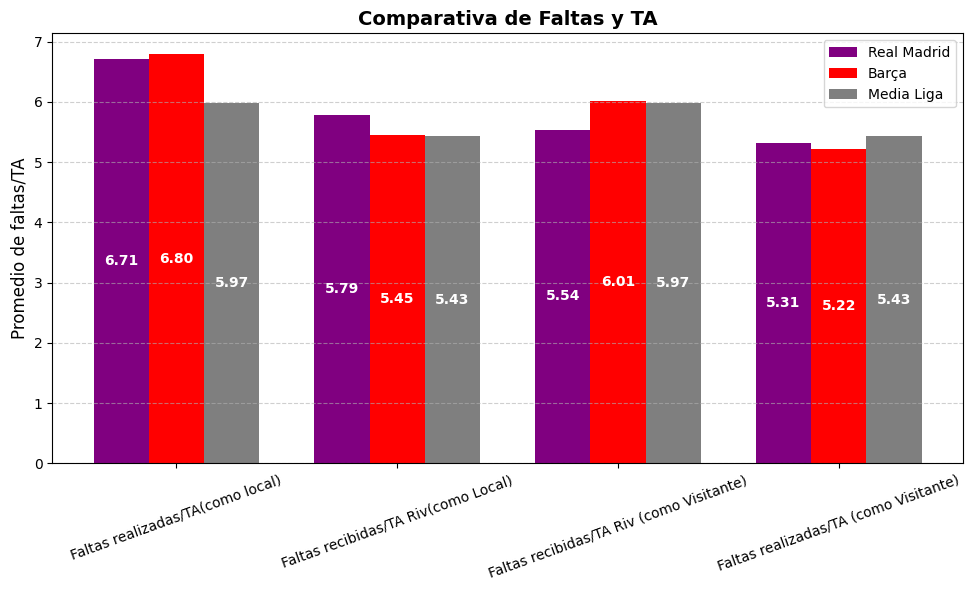

In [220]:
estadisticas_amarillas = df_amarillas.index.tolist()

real_madrid = Real_Madrid_amarillas
barca = Barsa_amarillas
media_liga = Resto_liga_amarillas


x = np.arange(len(estadisticas_amarillas))
ancho = 0.25

plt.figure(figsize=(10, 6))


bars_rm = plt.bar(x - ancho, real_madrid, width=ancho, label="Real Madrid",color="#800080")
bars_barca = plt.bar(x, barca, width=ancho, label="Barça", color = "red")
bars_media = plt.bar(x + ancho, media_liga, width=ancho, label="Media Liga", color = "#7F7F7F")


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height/2,                         
            f"{height:.2f}",                  
            ha='center', va='center', color='white', fontsize=10, fontweight='bold'
        )

add_labels(bars_rm)
add_labels(bars_barca)
add_labels(bars_media)


plt.xticks(x, estadisticas_amarillas, rotation=20, fontsize=10)
plt.ylabel("Promedio de faltas/TA", fontsize=12)
plt.title("Comparativa de Faltas y TA", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [221]:
Real_Madrid_rojas = pd.Series ([Falt_Ro_H_RM, Falt_Ro_H_Riv_RM,  Falt_Ro_A_Riv_RM, Falt_Ro_A_RM], name = "Real Madrid")
Barsa_rojas = pd.Series ([Falt_Ro_H_Bar, Falt_Ro_H_Riv_Bar, Falt_Ro_A_Riv_Bar, Falt_Ro_A_Bar], name = "Barsa")
Resto_liga_rojas = pd.Series ([media_fal_ro_local, media_fal_ro_visit, media_fal_ro_local, media_fal_ro_visit], name = "Media liga")
df_rojas = pd.concat([Real_Madrid_rojas, Barsa_rojas, Resto_liga_rojas],axis =1)

df_rojas


,Real Madrid,Barsa,Media liga
0,128.485714,160.269231,109.532134
1,111.586957,104.140000,88.360248
2,121.276596,85.835821,109.532134
3,83.277778,105.410256,88.360248


In [222]:
df_rojas = df_rojas.rename(index={0:"Faltas realizadas/TR(como local)",1:"Faltas recibidas/TR Riv(como Local)",2:"Faltas recibidas/TR Riv (como Visitante)",3:"Faltas realizadas/TR (como Visitante)"}) 

df_rojas.transpose().round(2)

,Faltas realizadas/TR(como local),Faltas recibidas/TR Riv(como Local),Faltas recibidas/TR Riv (como Visitante),Faltas realizadas/TR (como Visitante)
Real Madrid,128.49,111.59,121.28,83.28
Barsa,160.27,104.14,85.84,105.41
Media liga,109.53,88.36,109.53,88.36


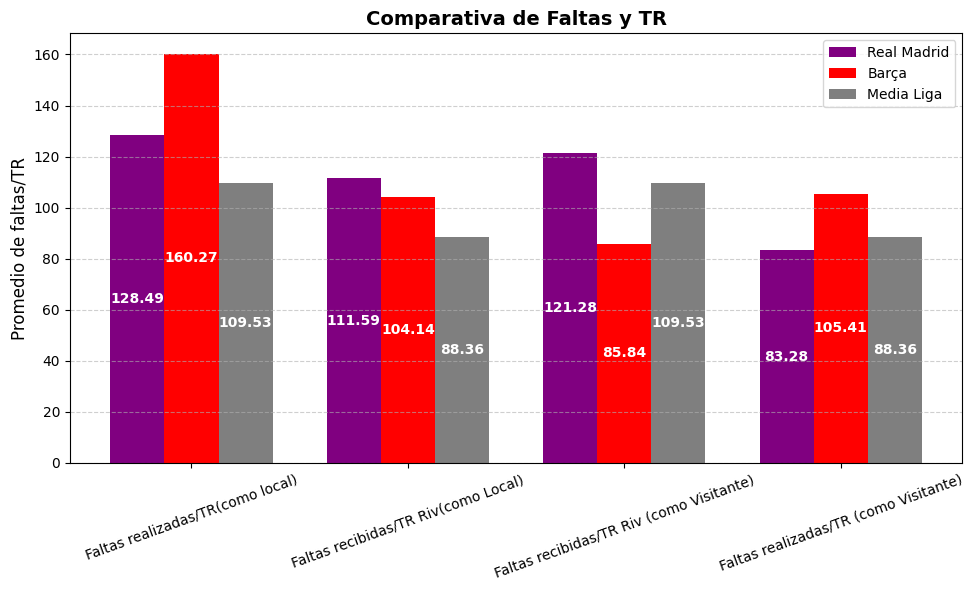

In [223]:
estadisticas_rojas = df_rojas.index.tolist()

real_madrid = Real_Madrid_rojas
barca = Barsa_rojas
media_liga = Resto_liga_rojas


x = np.arange(len(estadisticas_rojas))
ancho = 0.25

plt.figure(figsize=(10, 6))


bars_rm = plt.bar(x - ancho, real_madrid, width=ancho, label="Real Madrid",color="#800080")
bars_barca = plt.bar(x, barca, width=ancho, label="Barça", color = "red")
bars_media = plt.bar(x + ancho, media_liga, width=ancho, label="Media Liga", color = "#7F7F7F")


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,  
            height/2,                         
            f"{height:.2f}",                  
            ha='center', va='center', color='white', fontsize=10, fontweight='bold'
        )

add_labels(bars_rm)
add_labels(bars_barca)
add_labels(bars_media)


plt.xticks(x, estadisticas_rojas, rotation=20, fontsize=10)
plt.ylabel("Promedio de faltas/TR", fontsize=12)
plt.title("Comparativa de Faltas y TR", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [224]:
#Importancia de ser local

In [225]:
df_grandes_ligas = df[df["Division"].isin(grandes_ligas)]

df_grandes_ligas

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
0,F1,2000-07-28,Marseille,Troyes,3.0,1.0,H,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
1,F1,2000-07-28,Paris SG,Strasbourg,3.0,1.0,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.40,4.60
3,F1,2000-07-29,Auxerre,Sedan,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,3.30,3.90
4,F1,2000-07-29,Bordeaux,Metz,1.0,1.0,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
5,F1,2000-07-29,Guingamp,St Etienne,2.0,2.0,D,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,3.00,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230531,I1,2025-05-25,Lazio,Lecce,0.0,1.0,A,0.0,1.0,A,...,11.0,14.0,4.0,2.0,3.0,1.0,1.0,1.56,3.72,7.09
230532,I1,2025-05-25,Torino,Roma,0.0,2.0,A,0.0,1.0,A,...,11.0,2.0,1.0,1.0,1.0,0.0,0.0,5.74,4.16,1.57
230533,I1,2025-05-25,Udinese,Fiorentina,2.0,3.0,A,1.0,0.0,H,...,6.0,2.0,8.0,3.0,2.0,1.0,0.0,3.68,3.64,1.99
230534,I1,2025-05-25,Venezia,Juventus,2.0,3.0,A,1.0,2.0,A,...,18.0,6.0,6.0,1.0,2.0,0.0,0.0,5.80,4.23,1.55


In [226]:
grandes_ligas_HAD = df_grandes_ligas["FTResult"].value_counts()

grandes_ligas_HAD

FTResult
H    26387
A    16546
D    14689
Name: count, dtype: int64

In [227]:
media_HAD = df["FTResult"].value_counts()

media_HAD

FTResult
H    102873
A     66560
D     61121
Name: count, dtype: int64

In [228]:
def lista_media_HAD(ligas):
    resultados = ligas["FTResult"].value_counts()
    media_liga =[]
    for i in resultados:
        media_liga.append(round(i/ligas["FTResult"].count(),3))
    return pd.Series(media_liga)


In [229]:
media_total_HAD = lista_media_HAD(df)

print(media_total_HAD)



0    0.446
1    0.289
2    0.265
dtype: float64


In [230]:
media_grandes_ligas_HAD = lista_media_HAD(df_grandes_ligas)

media_grandes_ligas_HAD 

0    0.458
1    0.287
2    0.255
dtype: float64

In [231]:
media_ESP_HAD = lista_media_HAD(df[df["Division"]=="SP1"])

media_ESP_HAD

0    0.471
1    0.277
2    0.252
dtype: float64

In [232]:
media_resto_ligas_HAD = lista_media_HAD(resto_ligas)
media_resto_ligas_HAD


0    0.442
1    0.289
2    0.268
dtype: float64

In [233]:
df_HAD = pd.concat([media_grandes_ligas_HAD,media_resto_ligas_HAD,media_total_HAD],axis=1)
df_HAD

,0,1,2
0,0.458,0.442,0.446
1,0.287,0.289,0.289
2,0.255,0.268,0.265


In [234]:
df_HAD = df_HAD.rename(columns={0: "Media grandes ligas", 1: "Media resto ligas", 2: "Media total"})
df_HAD.index= ["Victoria Local","Empate","Victoria Visitante"]
df_HAD

,Media grandes ligas,Media resto ligas,Media total
Victoria Local,0.458,0.442,0.446
Empate,0.287,0.289,0.289
Victoria Visitante,0.255,0.268,0.265


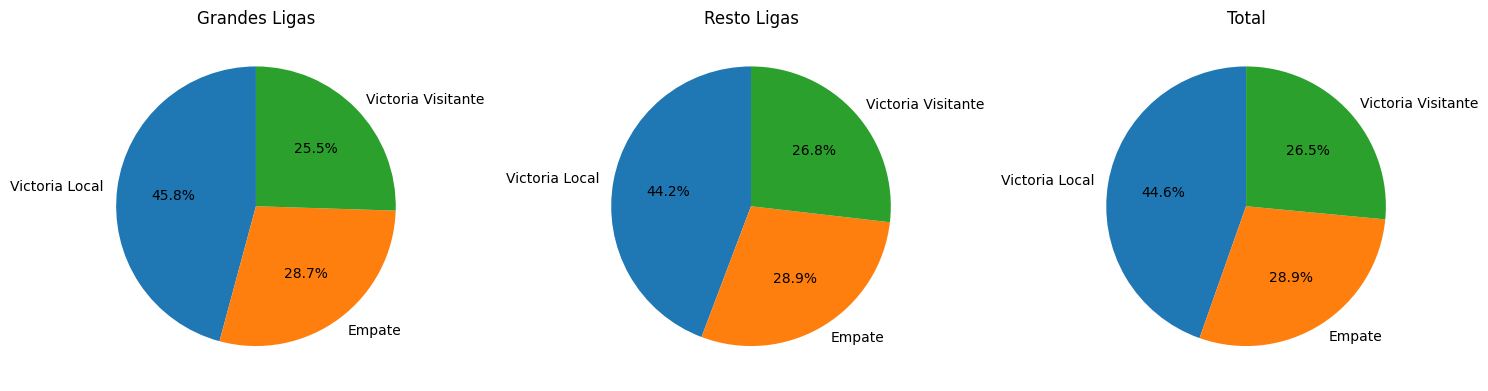

In [235]:

categorias = ["Victoria Local","Empate","Victoria Visitante"]
grandes_ligas = media_grandes_ligas_HAD
resto_ligas = media_resto_ligas_HAD
total = media_total_HAD


fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].pie(grandes_ligas, labels=categorias, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Grandes Ligas')

# Pie chart para resto de ligas
axes[1].pie(resto_ligas, labels=categorias, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Resto Ligas')

# Pie chart para total
axes[2].pie(total, labels=categorias, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Total')

# Ajustar layout
plt.tight_layout()
plt.show()

In [236]:
#Importancia rojas

In [248]:
df_roja_partido = df["AwayRed"].dropna()

In [247]:
df_roja_partido = df["HomeRed"].dropna()

In [238]:
mascara_partidos_roja = (df["HomeRed"]>0)| (df["AwayRed"]>0)

df_roja_partido = df[mascara_partidos_roja]


In [239]:
mascara_local_mas_rojas = df_roja_partido["HomeRed"] > df_roja_partido["AwayRed"]

mascara_local_mas_rojas

resultados_roja_local = df_roja_partido[mascara_local_mas_rojas].value_counts(df_roja_partido["FTResult"])

resultados_roja_local

FTResult
A    4063
D    2239
H    1879
Name: count, dtype: int64

In [240]:
mascara_visitante_mas_rojas = df_roja_partido["HomeRed"] < df_roja_partido["AwayRed"]

mascara_visitante_mas_rojas

resultados_roja_visitante = df_roja_partido[mascara_visitante_mas_rojas].value_counts(df_roja_partido["FTResult"])

resultados_roja_visitante

FTResult
H    7105
D    2714
A    1673
Name: count, dtype: int64

In [241]:
df_expulsiones = pd.DataFrame([resultados_roja_local,resultados_roja_visitante])

df_expulsiones 

FTResult,A,D,H
count,4063,2239,1879
count,1673,2714,7105


In [245]:
df_expulsiones = df_expulsiones.rename(columns={"A" : "Victoria visitante", "D":" Empate","H":"Victoria local"})
df_expulsiones

FTResult,Victoria visitante,Empate,Victoria local
Roja a local,4063,2239,1879
Roja a visitante,1673,2714,7105


In [246]:
df_expulsiones.index= ["Roja a local","Roja a visitante"]

df_expulsiones

FTResult,Victoria visitante,Empate,Victoria local
Roja a local,4063,2239,1879
Roja a visitante,1673,2714,7105


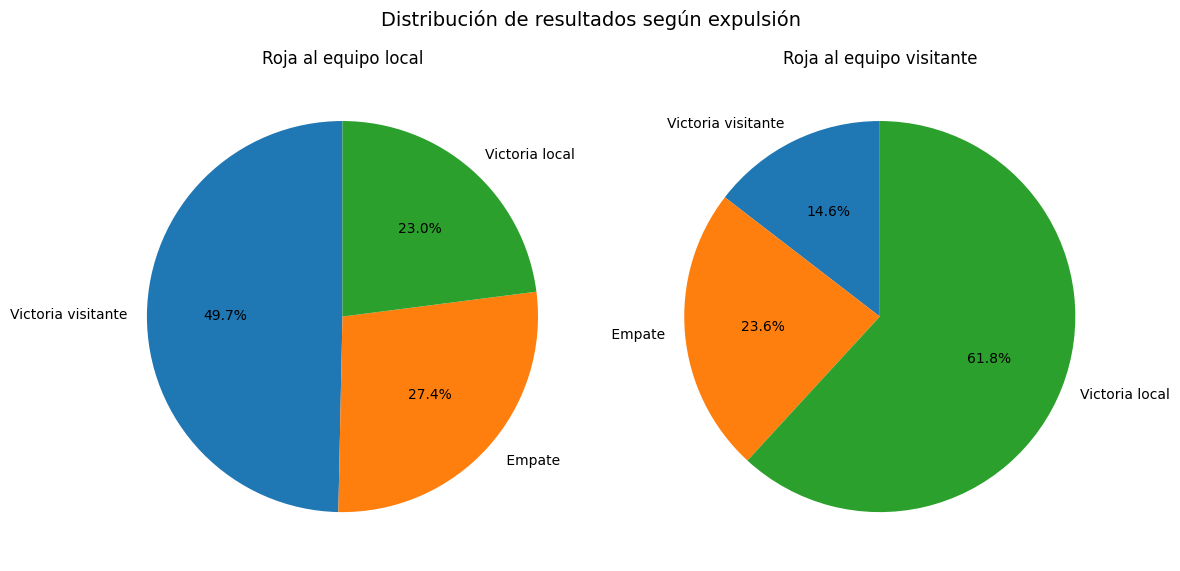

In [244]:

labels = df_expulsiones.columns
roja_local = df_expulsiones.loc["Roja a local"]
roja_visitante = df_expulsiones.loc["Roja a visitante"]

total_local = sum(roja_local)
total_visitante = sum(roja_visitante)

porcentaje_local = [x / total_local * 100 for x in roja_local]
porcentaje_visitante = [x / total_visitante * 100 for x in roja_visitante]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Roja al local
axes[0].pie(
    porcentaje_local, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[0].set_title('Roja al equipo local')

# Gráfico 2: Roja al visitante
axes[1].pie(
    porcentaje_visitante, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[1].set_title('Roja al equipo visitante')

plt.suptitle('Distribución de resultados según expulsión', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#Importancia Amarillas

In [249]:
df_amarilla_partido = df["AwayYellow"].dropna()

df_amarilla_partido = df["HomeYellow"].dropna()

In [251]:
mascara_partidos_amarilla = (df["HomeYellow"]>0)| (df["AwayYellow"]>0)

df_amarilla_partido = df[mascara_partidos_amarilla]

df_amarilla_partido

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
39,D1,2000-08-11,Dortmund,Hansa Rostock,1.0,0.0,H,0.0,0.0,D,...,19.0,7.0,3.0,1.0,5.0,0.0,0.0,1.50,3.40,5.00
40,D2,2000-08-11,Hannover,Nurnberg,1.0,1.0,D,0.0,0.0,D,...,NaN,NaN,NaN,1.0,1.0,0.0,0.0,2.40,3.00,2.60
41,D2,2000-08-11,Stuttgarter K,Oberhausen,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.80,3.10,3.80
42,D1,2000-08-12,Bayern Munich,Hertha,4.0,1.0,H,1.0,0.0,H,...,12.0,4.0,9.0,1.0,0.0,0.0,0.0,1.30,4.50,6.00
43,D1,2000-08-12,Freiburg,Stuttgart,4.0,0.0,H,2.0,0.0,H,...,17.0,4.0,7.0,1.0,1.0,0.0,0.0,2.40,3.10,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,Cartagena,Mirandes,1.0,3.0,A,1.0,2.0,A,...,8.0,4.0,6.0,3.0,1.0,0.0,0.0,12.33,6.19,1.20
230553,SP2,2025-06-01,Almeria,Tenerife,2.0,0.0,H,1.0,0.0,H,...,11.0,2.0,6.0,1.0,5.0,0.0,0.0,1.22,6.23,10.97
230554,SP2,2025-06-01,La Coruna,Elche,0.0,4.0,A,0.0,3.0,A,...,18.0,2.0,0.0,2.0,2.0,0.0,0.0,5.30,4.43,1.52
230555,SP2,2025-06-01,Oviedo,Cadiz,2.0,1.0,H,2.0,1.0,H,...,8.0,8.0,3.0,0.0,1.0,0.0,0.0,1.68,3.14,6.31


In [252]:
mascara_local_mas_amarillas = df_amarilla_partido["HomeYellow"] > df_amarilla_partido["AwayYellow"]

mascara_local_mas_amarillas

resultados_amarilla_local = df_amarilla_partido[mascara_local_mas_amarillas].value_counts(df_amarilla_partido["FTResult"])

resultados_amarilla_local

FTResult
H    14142
A    12207
D     9640
Name: count, dtype: int64

In [254]:
mascara_visitante_mas_amarillas = df_amarilla_partido["HomeYellow"] < df_amarilla_partido["AwayYellow"]

mascara_visitante_mas_amarillas

resultados_amarilla_visitante = df_amarilla_partido[mascara_visitante_mas_amarillas].value_counts(df_amarilla_partido["FTResult"])

resultados_amarilla_visitante

FTResult
H    25032
A    14093
D    13822
Name: count, dtype: int64

In [255]:
df_amarillas_final = pd.DataFrame([resultados_amarilla_local,resultados_amarilla_visitante])

df_amarillas_final

FTResult,H,A,D
count,14142,12207,9640
count,25032,14093,13822


In [256]:
df_amarillas_final = df_amarillas_final.rename(columns={"A" : "Victoria visitante", "D":" Empate","H":"Victoria local"})
df_amarillas_final

FTResult,Victoria local,Victoria visitante,Empate
count,14142,12207,9640
count,25032,14093,13822


In [257]:
df_amarillas_final.index= ["Más amarillas a local","Más amarillas a visitante"]

df_amarillas_final

FTResult,Victoria local,Victoria visitante,Empate
Más amarillas a local,14142,12207,9640
Más amarillas a visitante,25032,14093,13822


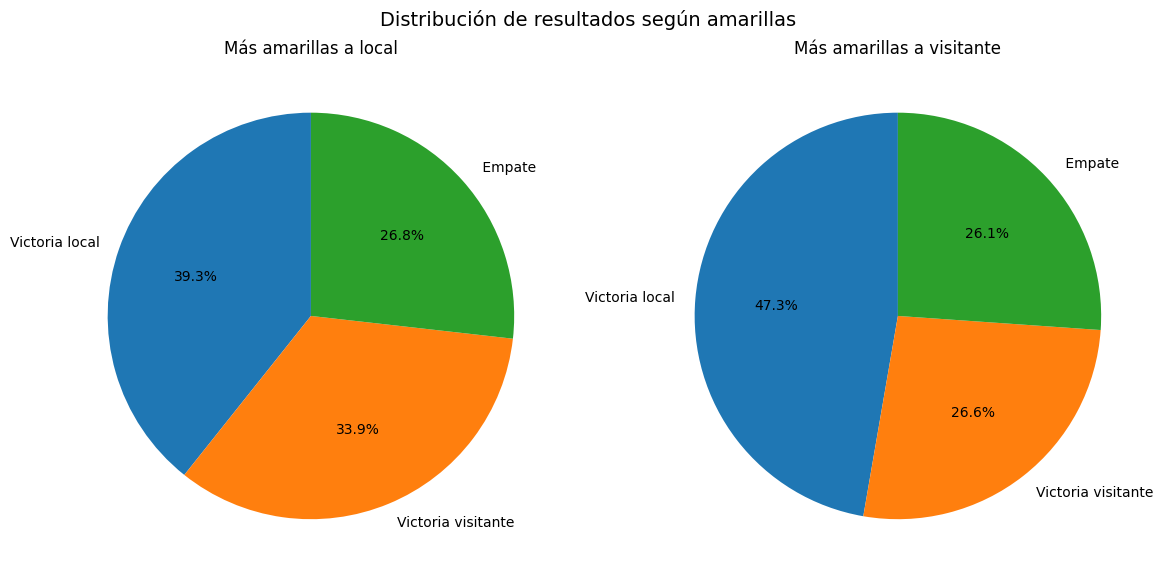

In [258]:
labels = df_amarillas_final.columns
amarilla_local = df_amarillas_final.loc["Más amarillas a local"]
amarilla_visitante = df_amarillas_final.loc["Más amarillas a visitante"]

total_amarilla_local = sum(roja_local)
total_amarilla_visitante = sum(roja_visitante)

porcentaje_local = [x / total_amarilla_local * 100 for x in amarilla_local]
porcentaje_visitante = [x / total_amarilla_visitante * 100 for x in amarilla_visitante]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    porcentaje_local, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[0].set_title('Más amarillas a local')


axes[1].pie(
    porcentaje_visitante, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[1].set_title('Más amarillas a visitante')

plt.suptitle('Distribución de resultados según amarillas', fontsize=14)
plt.tight_layout()
plt.show()